In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [61]:
df= pd.read_csv('us_job_vs_inflation_data.csv')

In [62]:
df.shape

(13, 5)

In [63]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

duplicates = df.duplicated()
print("Number of duplicates: ", duplicates.sum())

null_values = df.isnull()
print("Number of null values: ", null_values.sum().sum())

missing_values = df.isnull()
print("Number of missing values: ", missing_values.sum().sum())

Number of rows: 13
Number of columns: 5
Number of duplicates:  0
Number of null values:  0
Number of missing values:  0


In [64]:
df.tail()

,year,no_of_employees,cpi,ppi,gdp_rate
8,2016,6517600,2.21,0.42,1.05
9,2017,7003600,1.84,2.33,1.88
10,2018,7145800,2.14,2.90,2.40
11,2019,7363700,2.19,1.69,1.79
12,2020,7169200,1.70,-2.12,1.21


In [65]:
df.columns

Index(['year', 'no_of_employees', 'cpi', 'ppi', 'gdp_rate'], dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             13 non-null     int64  
 1   no_of_employees  13 non-null     int64  
 2   cpi              13 non-null     float64
 3   ppi              13 non-null     float64
 4   gdp_rate         13 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 652.0 bytes


In [67]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['no_of_employees', 'cpi', 'ppi', 'gdp_rate']

scaler = MinMaxScaler()
scaler.fit(df[cols_to_scale])

df[cols_to_scale] = scaler.transform(df[cols_to_scale])
df.head()

,year,no_of_employees,cpi,ppi,gdp_rate
0,2008,0.124272,1.000000,1.000000,0.725610
1,2009,0.000000,0.552239,0.000000,0.000000
2,2010,0.048528,0.000000,0.714209,0.250000
3,2011,0.140793,0.522388,0.681501,0.810976
4,2012,0.208525,0.858209,0.573727,0.707317


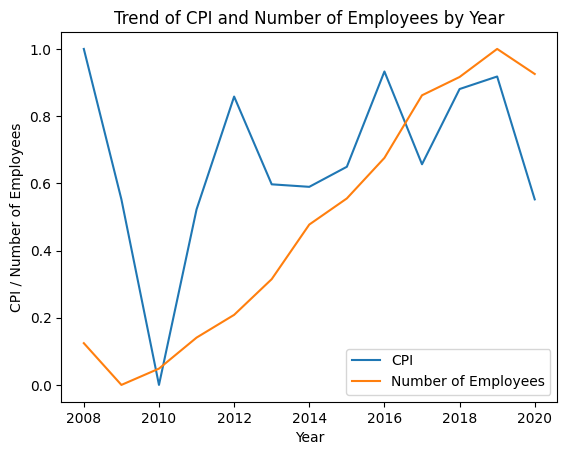

In [68]:
yearly_data = df.groupby('year').mean()

cpi = yearly_data['cpi']
no_of_employees = yearly_data['no_of_employees']

plt.plot(cpi, label='CPI')
plt.plot(no_of_employees, label='Number of Employees')

plt.title('Trend of CPI and Number of Employees by Year')
plt.xlabel('Year')
plt.ylabel('CPI / Number of Employees')

plt.legend()

plt.show()

1. The CPI (Consumer Price Index) is a measure of inflation that tracks the average change in prices of goods and services purchased by households over time. A high CPI indicates a high rate of inflation, while a low CPI indicates a low rate of inflation.
2. Whether a high or low CPI is better for a country depends on the specific circumstances. In general, a low and stable rate of inflation is desirable for most economies.
3. However, some economists argue that a very low or negative inflation rate can also have negative consequences, such as the risk of deflation, which can lead to lower economic growth and higher unemployment

1. the cpi was lowest in 2010 because the no of employees were also less then.
2. as the employee intake grew, the cpi was never stable and low which is a sign of high inflation.
3. 2019 records highest employee intake and so does the cpi

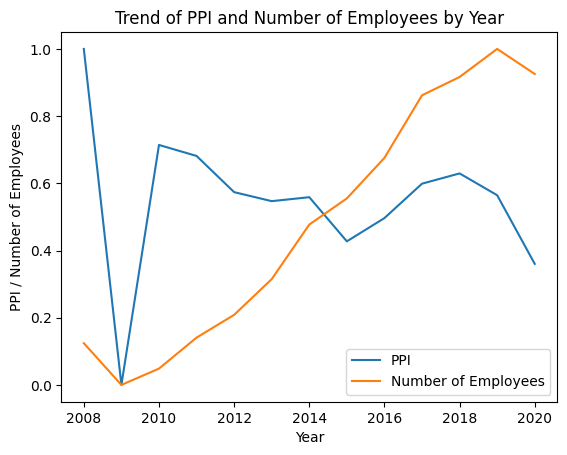

In [69]:
yearly_data = df.groupby('year').mean()

ppi = yearly_data['ppi']
no_of_employees = yearly_data['no_of_employees']

plt.plot(ppi, label='PPI')
plt.plot(no_of_employees, label='Number of Employees')

plt.title('Trend of PPI and Number of Employees by Year')
plt.xlabel('Year')
plt.ylabel('PPI / Number of Employees')

plt.legend()

plt.show()

1. PPI stands for "Producer Price Index," which is a measure of the average change over time in the selling prices received by domestic producers for their output.
2. very high PPI inflation can be a sign of cost pressures that could eventually result in higher consumer prices and inflation, which can negatively impact the economy.
3. low PPI inflation may indicate weak demand and sluggish economic growth, it can also help keep consumer prices low and stable, which can support consumer purchasing power and overall economic stability.
4. In general, a moderate level of PPI inflation can be positive for an economy

ppi was moderate through these years with not so drastic flickering

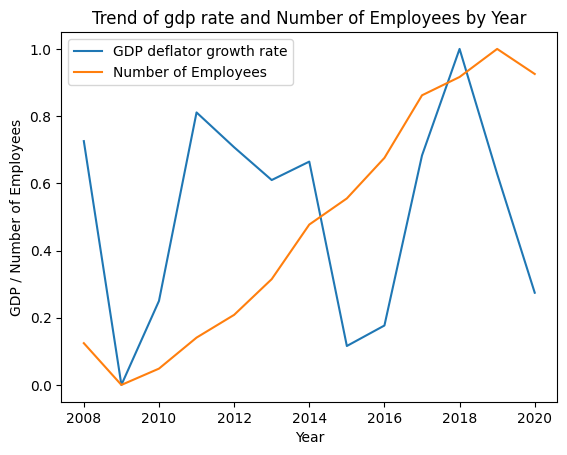

In [70]:
yearly_data = df.groupby('year').mean()

gdp = yearly_data['gdp_rate']
no_of_employees = yearly_data['no_of_employees']

plt.plot(gdp, label='GDP deflator growth rate')
plt.plot(no_of_employees, label='Number of Employees')

plt.title('Trend of gdp rate and Number of Employees by Year')
plt.xlabel('Year')
plt.ylabel('GDP / Number of Employees')

plt.legend()

plt.show()

1. The GDP deflator is a measure of the overall price level of goods and services produced in an economy, and the growth rate of the GDP deflator reflects changes in this overall price level over time.
2. In general, a moderate level of GDP deflator growth can be positive for an economy, as it can signal healthy economic growth and investment, and help maintain price stability. Generally, a moderate and stable growth rate is often viewed as desirable for a healthy economy.


For a healthy economy, the gdp deflator rate needs to stable, but as the no of emplyees increases the gdp rate keeps on flickering, sometimes dropping and sometimes rising to its peak, thus the economy doesnt seem to be healthy for US